1. Import Data

In [6]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
data = pd.read_csv('diabetes-dataset.csv')
df = pd.DataFrame(data)
df.columns
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [7]:
data.shape

(2000, 9)

In [8]:
data.Outcome.value_counts()

Outcome
0    1316
1     684
Name: count, dtype: int64

2. Cleaning Data

In [9]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
#Cek Data Duplikat
data.duplicated().sum()

np.int64(1256)

In [11]:
#Hapus Data Duplikat
data = data.drop_duplicates()

In [12]:
#Cek Data Duplikat
data.duplicated().sum()

np.int64(0)

3. Exploratory Data Analysis (EDA)

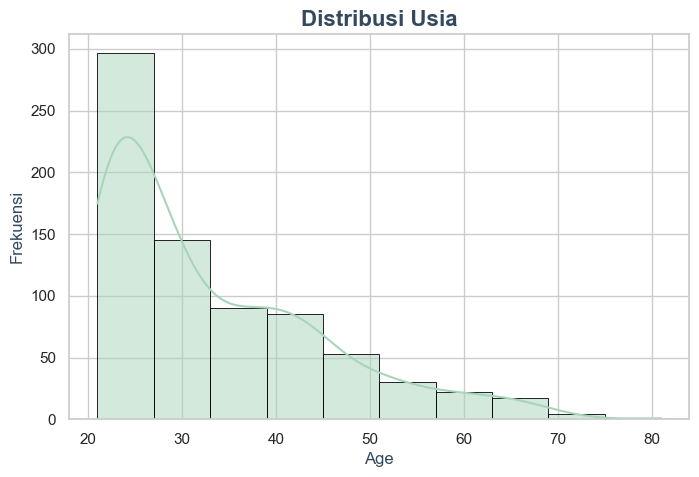

In [13]:
sns.set(style='whitegrid')
plt.figure(figsize=(8,5))
sns.histplot(data=data, x='Age', bins=10, kde=True, color='#A8D5BA', edgecolor="black", linewidth=0.6)
plt.title('Distribusi Usia', fontsize=16, fontweight='bold', color ='#34495E')
plt.xlabel('Age', fontsize=12, color ='#34495E')
plt.ylabel('Frekuensi', fontsize=12, color ='#34495E')
plt.show()


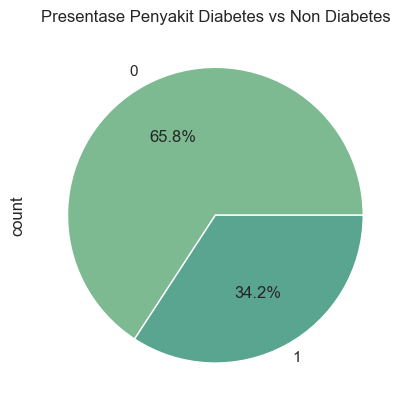

In [14]:
sns.set_palette("crest")
df['Outcome'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Presentase Penyakit Diabetes vs Non Diabetes')
plt.show()

4. Preparation Data

In [15]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

print("X :", X.shape)
print("y :", y.shape)

X : (2000, 8)
y : (2000,)


In [16]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [17]:
#memisahkan data ke dalam subset pelatihan dan pengujian dengan perbandingan 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5. Modeling & Evaluation 


In [18]:
models ={
    "K-Nearest Neighbors" : KNeighborsClassifier(),
    "Gradient Boosting" : GradientBoostingClassifier()
}

In [19]:
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    
    results.append({
        "Model" : model_name,
        "Accuracy" : accuracy,
        "Precision " : report["weighted avg"]["precision"],
        "Recall " : report["weighted avg"]["recall"],
        "F-1 Score " : report["weighted avg"]["f1-score"]
    })

# Membuat DataFrame untuk menampilkan hasil evaluasi
evaluation_data = pd.DataFrame(results)
print(evaluation_data)



               Model  Accuracy  Precision   Recall   F-1 Score 
0                KNN    0.8225    0.820598   0.8225    0.820617
1  Gradient Boosting    0.8875    0.889483   0.8875    0.885172


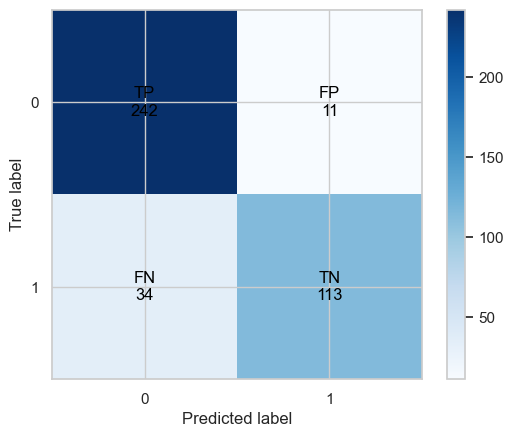

In [21]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
label = np.array([['TP', 'FP'], ['FN', 'TN']])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, include_values=False)

for i in range(2):
    for j in range(2):
        plt.text(j, i, f'{label[i,j]}\n{cm[i,j]}', color='black', ha='center', va='center', fontsize=12)


plt.show()

6. Testing

In [22]:
data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
199,4,148,60,27,318,30.9,0.150,29,1
565,2,95,54,14,88,26.1,0.748,22,0
45,0,180,66,39,0,42.0,1.893,25,1
596,0,67,76,0,0,45.3,0.194,46,0
343,5,122,86,0,0,34.7,0.290,33,0
190,3,111,62,0,0,22.6,0.142,21,0
131,9,122,56,0,0,33.3,1.114,33,1
69,4,146,85,27,100,28.9,0.189,27,0
671,1,99,58,10,0,25.4,0.551,21,0
263,3,142,80,15,0,32.4,0.200,63,0


In [23]:
new_data =  pd.DataFrame({
    'Pregnancies' : [8],
    'Glucose' : [131],
    'BloodPressure' : [78],
    'SkinThickness' : [20],
    'Insulin' : [30],
    'BMI' : [32.6],
    'DiabetesPedigreeFunction' : [0.389],
    'Age' : [32],
})

new_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,8,131,78,20,30,32.6,0.389,32


In [24]:
new_data_scaled = scaler.transform(new_data)

for model_name, model in models.items():
    prediction = model.predict(new_data_scaled)
    hasil_prediksi = "Non Diabetes" if prediction[0] == 0 else 'Diabetes'
    print(f"Prediksi Penyakit oleh {model_name}: {hasil_prediksi}")

Prediksi Penyakit oleh KNN: Non Diabetes
Prediksi Penyakit oleh Gradient Boosting: Diabetes
